In [2]:
!pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ---- ---------------------------------- 30.7/293.3 kB 1.3 MB/s eta 0:00:01
     --------- --------------------------- 71.7/293.3 kB 787.7 kB/s eta 0:00:01
     ----------------- ------------------ 143.4/293.3 kB 944.1 kB/s eta 0:00:01
     --------------------- -------------- 174.1/293.3 kB 871.5 kB/s eta 0:00:01
     --------------------------- -------- 225.3/293.3 kB 919.0 kB/s eta 0:00:01
     --------------------------------- -- 276.5/293.3 kB 947.5 kB/s eta 0:00:01
     ------------------------------------ 293.3/293.3 kB 904.3 kB/s eta 0:00:00


In [4]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 1.4 MB/s eta 0:00:02
   - -------------------------------------- 0.1/1.4 MB 787.7 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 901.1 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.4 MB 958.1 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 986.4 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 1.0 MB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 936.6 kB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.4 MB 998.3 kB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.4 MB 948.6 kB/s eta 0:00:02
   ------------ -----------------

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions


In [9]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



In [10]:
X,y=make_moons(100,noise=0.25,random_state=2)

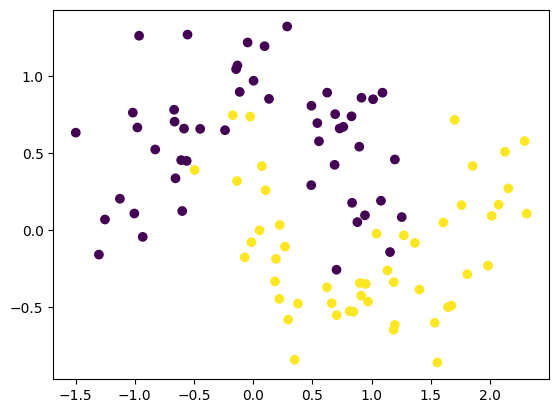

In [11]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [12]:
model1=Sequential()
model1.add(Dense(128,input_dim=2,activation="relu"))
model1.add(Dense(128,activation="relu"))
model1.add(Dense(1,activation="relu"))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


9600/9600 [==============================] - 9s 978us/step


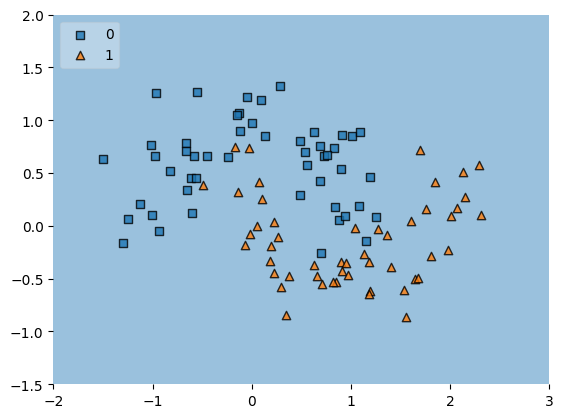

In [28]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam,
metrics=['accuracy'])
history1 = model1.fit(X, y, epochs=2000, validation_split =
0.2,verbose=0)
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2) 
plt.xlim(-2,3) 
plt.ylim(-1.5,2) # sets the limits of the y-axis
plt.show()

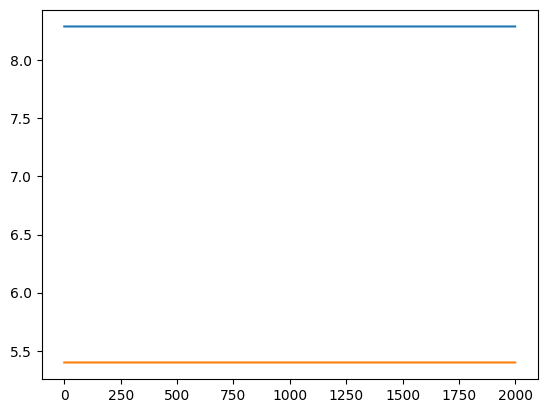

In [30]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [31]:
model2=Sequential()
model2.add(Dense(128,input_dim=2,
activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


9600/9600 [==============================] - 10s 1ms/step


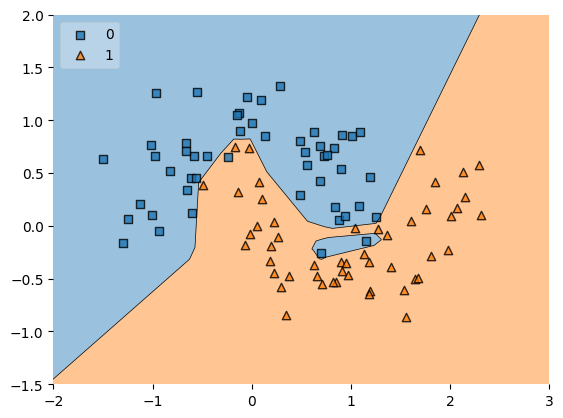

In [32]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam,metrics=['accuracy'])
history2 = model2.fit(X, y, epochs=2000, validation_split =0.2,verbose=0)
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

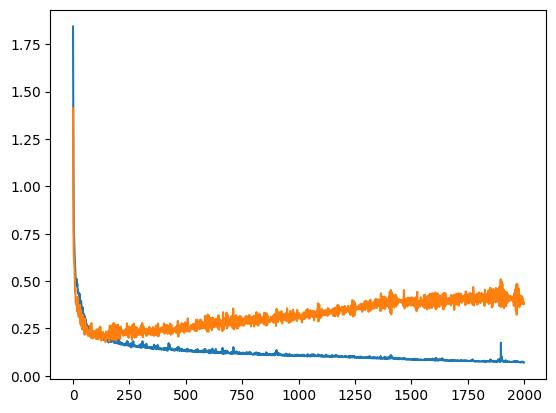

In [33]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [35]:
acc_model1 = history1.history['accuracy'][-1] * 100
acc_model2 = history2.history['accuracy'][-1] * 100
print(f"Accuracy for Model 1: {acc_model1:.2f}%")
print(f"Accuracy for Model 2: {acc_model2:.2f}%")

Accuracy for Model 1: 46.25%
Accuracy for Model 2: 100.00%
